In [22]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
data=pd.read_csv('C:/Users/user/Downloads/bank.csv',header=0)
data=data.dropna()
print(data.shape)
print(list(data.columns))

(11162, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [23]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [24]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["unknown"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

job
70
0.63%


education
497
4.45%


contact
2346
21.02%


poutcome
8326
74.59%




In [25]:
data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

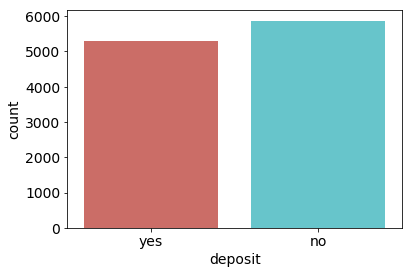

<Figure size 432x288 with 0 Axes>

In [26]:
sns.countplot(x='deposit',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [27]:
data["deposit"].value_counts()[0] / data.shape[0]

0.5261601863465328

In [28]:
data["deposit"].value_counts()[1] / data.shape[0]

0.4738398136534671

In [29]:
data.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [30]:
import numpy as np
for col in data:
    b, c = np.unique(data[col], return_inverse=True) 
    data[col] = c

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
array = data.values
X = array[:,0:16]
Y = array[:,16]
rfe = RFE(model)
fit = rfe.fit(X, Y)
i=0
feature=list()
print('Num Features:',fit.n_features_)
for x,y in zip(fit.support_,data):
    if x:
        feature.append(y)
print("Feature Ranking:",fit.ranking_)
print("Selected Features:",feature)

Num Features: 8
Feature Ranking: [6 4 1 1 1 9 1 1 1 5 2 7 1 8 1 3]
Selected Features: ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous']


In [43]:
drop_elements = ['age','job','balance','day','month','duration','pdays','poutcome','deposit']
y = data["deposit"]
X = data.drop(drop_elements, axis=1)
X.head()

,marital,education,default,housing,loan,contact,campaign,previous
0,1,1,0,1,0,2,0,0
1,1,1,0,0,0,2,0,0
2,1,1,0,1,0,2,0,0
3,1,1,0,1,0,2,0,0
4,1,2,0,0,0,2,1,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.6659202866099417
